In [2]:
# Importing the libraries 
import numpy as np
from sklearn.utils import resample 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import cross_validate 
import warnings
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve
from sklearn. metrics import roc_auc_score
warnings.filterwarnings("ignore", message="numpy.dtype size changed") 
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
#import io
#dataset =pd.read_csv(io. BytesIO(uploaded [ 'creditcard.csv']))

In [4]:

dataset=pd.read_csv('creditcard.csv')

Text(0, 0.5, 'Frequency')

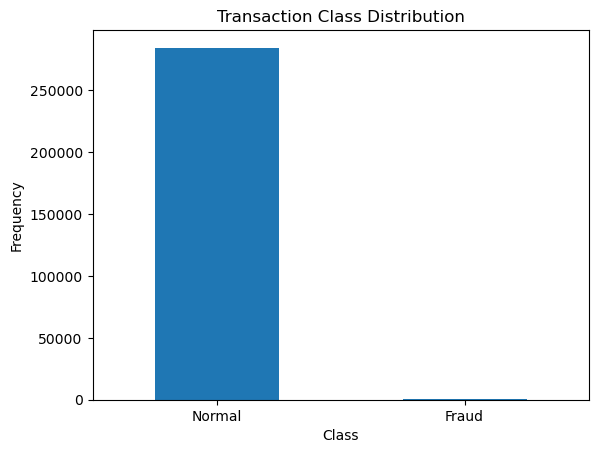

In [6]:
Fraud=dataset[dataset['Class']==1]
Normal=dataset[dataset ['Class']==0]
#count_classes = pd.value_counts (dataset [ 'Class'], sort = True) 
count_classes=pd.Series(dataset['Class']).value_counts(sort = True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS=["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [10]:

X=dataset.iloc[:, [1, 29]].values
y=dataset.iloc[:, 30].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confusion matrix for Normal logistic regression
[[71074     8]
 [  120     0]]
AUC for Normal Logistic Regression: 0.793


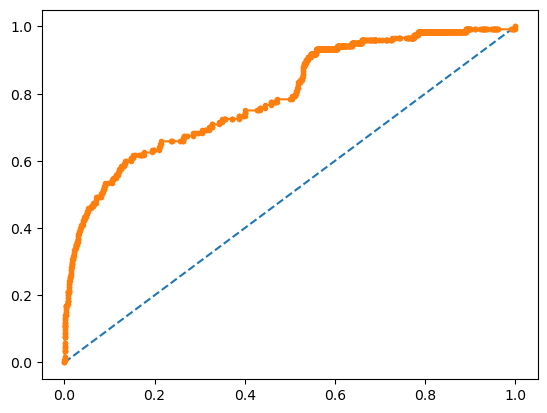

In [11]:
#1.Logistic Normal
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred1=classifier.predict(X_test)
cm1=confusion_matrix(y_test, y_pred1)
print('Confusion matrix for Normal logistic regression') 
print(cm1)
probs=classifier.predict_proba(X_test)
probs=probs[:, 1]
auc1=roc_auc_score(y_test, probs)
print('AUC for Normal Logistic Regression: %.3f' % auc1)
fpr, tpr, thresholds=roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr, marker='.')
plt.show()

Confusion matrix for NormalKNN
[[71074     8]
 [  119     1]]
AUC for Normal KNN: 0.576


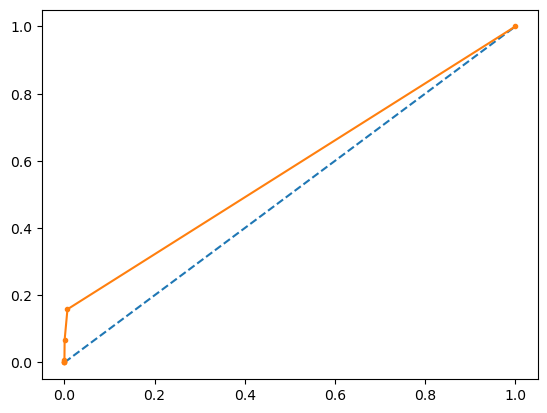

In [13]:
#2.KNN normal
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
classifier.fit(X_train, y_train)
y_pred2=classifier.predict(X_test)
cm2=confusion_matrix(y_test, y_pred2) 
print('Confusion matrix for NormalKNN') 
print(cm2)
probs=classifier.predict_proba (X_test) 
probs=probs[:, 1]
auc2=roc_auc_score (y_test, probs) 
print('AUC for Normal KNN: %.3f' % auc2) 
fpr, tpr, thresholds=roc_curve (y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--') 
plt.plot(fpr, tpr, marker='.')
plt.show()

Confusion matrix for Normal Decision Tree
[[71082     0]
 [  120     0]]
AUC for Normal Decision Tree: 0.844


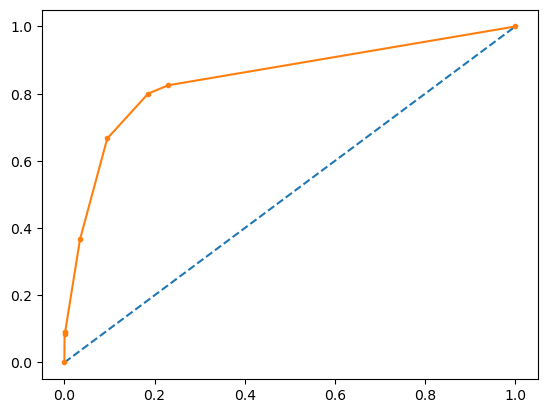

In [17]:
#3.Decision Tree normal
classifier=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,random_state=0)
classifier.fit(X_train, y_train)
y_pred3=classifier.predict(X_test)
cm3=confusion_matrix(y_test, y_pred3)
print('Confusion matrix for Normal Decision Tree')
print(cm3)
probs=classifier.predict_proba(X_test)
probs=probs[:, 1]
auc3=roc_auc_score(y_test, probs)
print('AUC for Normal Decision Tree: %.3f' % auc3) 
fpr, tpr, thresholds=roc_curve (y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle= '--') 
plt.plot(fpr, tpr, marker='.')
plt.show()

Confusion matrix for Normal Random Forest
[[71047    35]
 [  115     5]]
AUC for Normal Random Forest: 0.615


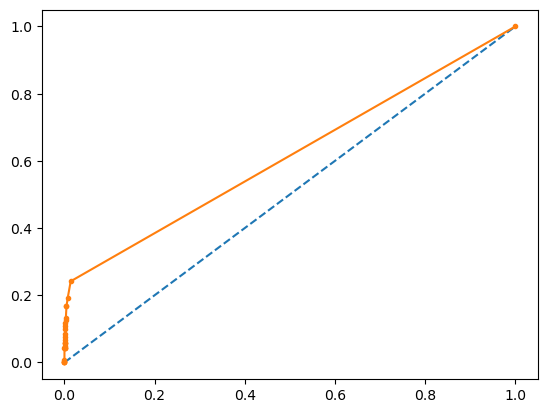

In [18]:
#4.Random Forest normal
classifier=RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0) 
classifier.fit(X_train, y_train)
y_pred4=classifier.predict(X_test)
cm4=confusion_matrix (y_test, y_pred4)
print('Confusion matrix for Normal Random Forest') 
print(cm4)
probs=classifier.predict_proba(X_test) 
probs=probs[:, 1]
auc4=roc_auc_score(y_test, probs)
print('AUC for Normal Random Forest: %.3f' % auc4) 
fpr, tpr, thresholds=roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Confusion matrix for Normal XGBoost
[[71079     3]
 [  118     2]]
AUC for Normal XGboost: 0.883


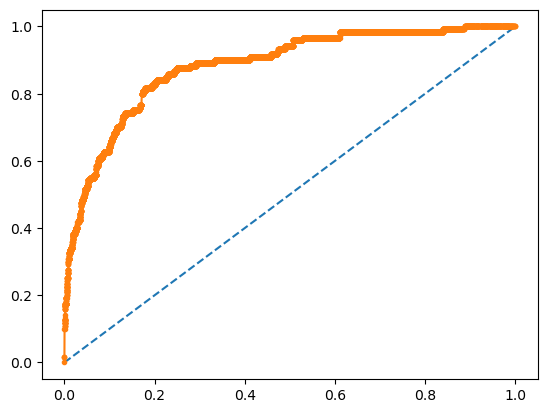

In [19]:
#5.Xgboost normal
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred5=model.predict(X_test)
cm5=confusion_matrix(y_test, y_pred5) 
print('Confusion matrix for Normal XGBoost')
print(cm5)
probs=model.predict_proba(X_test)
probs=probs[:, 1]
auc5=roc_auc_score(y_test, probs)
print('AUC for Normal XGboost: %.3f' % auc5) 
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle= '--') 
plt.plot(fpr, tpr, marker='.')
plt.show()

In [33]:
print("Accuracy comparison for diff Algorithms")
print("-----------------------------------------")
print("Logistic Normal         |  %.3f" % auc1)
print("KNN normal              |  %.3f" % auc2)
print("Decision Tree normal    |  %.3f" % auc3)
print("Random Forest normal    |  %.3f" % auc4)
print("Xgboost normal          |  %.3f" % auc5)

Accuracy comparison for diff Algorithms
-----------------------------------------
Logistic Normal         |  0.793
KNN normal              |  0.576
Decision Tree normal    |  0.844
Random Forest normal    |  0.615
Xgboost normal          |  0.883
